<a href="https://colab.research.google.com/github/Anggarciaar/Proyecto_AnalisisGeoespacial/blob/main/Proyecto_AnalisisGeoespacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import os
base_dir="/content/drive/MyDrive/DATA_ProyectoAG"
print(base_dir)

/content/drive/MyDrive/DATA_ProyectoAG


# **CARGA DE DATOS**
1.Prueba con datos de Emisiones por departamento.

In [ ]:
!pipintall pandas


/bin/bash: pipintall: command not found


In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 56.9 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd

In [ ]:
Departamentos = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Emisiones_Departamento/EA_TCNCC_EN_100K_2016.shp")

In [ ]:
Departamentos.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cod_depto   33 non-null     object  
 1   departamen  33 non-null     object  
 2   ems_nts_GE  33 non-null     float64 
 3   IPPC_energ  33 non-null     float64 
 4   IPPC_IPPU   33 non-null     float64 
 5   IPPC_AFOLU  33 non-null     float64 
 6   IPPC_resid  33 non-null     float64 
 7   sctr_fores  33 non-null     float64 
 8   sctr_indus  33 non-null     float64 
 9   sctr_agrop  33 non-null     float64 
 10  sctr_trans  33 non-null     float64 
 11  sctr_minas  33 non-null     float64 
 12  sctr_sanea  33 non-null     float64 
 13  sctr_resid  33 non-null     float64 
 14  sctr_comer  33 non-null     float64 
 15  area_ha     33 non-null     float64 
 16  SHAPE_Leng  33 non-null     float64 
 17  SHAPE_Area  33 non-null     float64 
 18  RULEID      33 non-null     int64   
 19  ge

In [ ]:
Departamentos.head(32)

,cod_depto,departamen,ems_nts_GE,IPPC_energ,IPPC_IPPU,IPPC_AFOLU,IPPC_resid,sctr_fores,sctr_indus,sctr_agrop,sctr_trans,sctr_minas,sctr_sanea,sctr_resid,sctr_comer,area_ha,SHAPE_Leng,SHAPE_Area,RULEID,geometry
0,91,AMAZONAS,0.513058,83.027695,0.786040,422.302502,6.942034,404.831433,0.158128,19.845740,25.099117,0.0,6.942034,6.288620,0.434545,1.094979e+07,25.596483,8.877566,2,"POLYGON ((-69.43300 -1.06967, -69.43309 -1.070..."
1,05,ANTIOQUIA,12.946967,8793.464113,1350.703025,1236.964593,1565.835611,1444.536348,5247.494024,18.338103,3880.540778,0.0,1031.445886,599.901859,247.149863,6.296306e+06,21.109882,5.147846,6,"POLYGON ((-74.82915 8.19958, -74.82858 8.19945..."
2,81,ARAUCA,3.462820,244.463869,4.979072,3156.942814,56.434010,1694.365789,0.925160,1500.916424,39.772105,0.0,56.406601,21.701719,1.572121,2.382024e+06,8.987916,1.941630,3,"POLYGON ((-69.42759 6.10748, -69.42839 6.10742..."
3,08,ATLÁNTICO,7.341928,5506.572866,674.963450,497.446684,662.945224,157.551756,1629.713659,362.912386,1149.086209,0.0,486.964824,235.333159,114.212659,3.321987e+05,2.529379,0.274446,4,"POLYGON ((-74.85257 11.10548, -74.84393 11.072..."
4,13,BOLÍVAR,7.311540,2877.350050,1130.339006,2824.149233,479.701379,1436.953784,1527.318930,1445.815313,1117.092574,0.0,410.296608,191.124196,42.344982,2.669793e+06,14.975281,2.193822,4,"POLYGON ((-75.22236 10.79653, -75.22224 10.796..."
5,15,BOYACÁ,9.998332,5536.980714,1468.516781,2756.365356,236.469266,1200.349930,3096.423317,1677.745295,836.305070,0.0,211.914586,324.576061,43.155498,2.315195e+06,15.454153,1.889526,5,"POLYGON ((-72.04767 7.03830, -72.04681 7.03917..."
6,17,CALDAS,-0.533074,956.273150,39.084520,-1830.123625,301.691872,117.717776,349.585154,-1900.852581,498.331265,0.0,220.905235,128.098961,29.622734,7.438898e+05,6.521573,0.606614,1,"POLYGON ((-74.66030 5.76716, -74.65912 5.76428..."
7,18,CAQUETÁ,18.605941,279.808564,5.664958,18242.003860,78.463313,16305.834248,6.431997,1955.139095,195.049999,0.0,77.204294,60.128600,2.940459,9.010823e+06,21.306751,7.318908,6,"POLYGON ((-73.66003 1.61206, -73.66003 1.61206..."
8,85,CASANARE,9.443649,5496.804939,7.691213,3822.836208,116.316823,503.974694,15.188720,3373.298929,445.638812,0.0,108.783672,25.665734,10.991966,4.436293e+06,11.975771,3.612520,5,"POLYGON ((-72.33887 6.34575, -72.34114 6.34496..."
9,19,CAUCA,0.926403,1344.910817,26.237913,-749.209666,304.463452,1544.010173,832.741703,-2250.432836,341.502439,0.0,183.639232,238.287917,12.989494,3.124940e+06,13.769394,2.534944,2,"POLYGON ((-76.05335 3.21896, -76.05293 3.21847..."


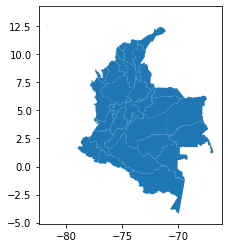

In [ ]:
Departamentos.plot();

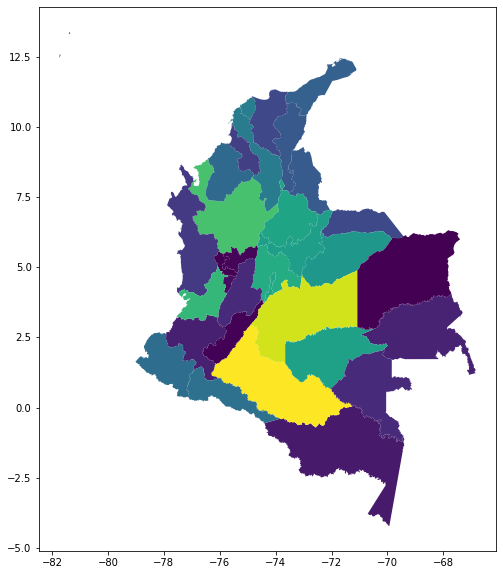

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
Departamentos.plot(column='ems_nts_GE', ax=ax);

# **2.Cuencas sedimentarias de Colombia.**

In [ ]:
import pandas as pd

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Cuencas = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Cuencas_Sedimentarias/CUENCAS_AJUSTADAS_2010.shp")

In [ ]:
Cuencas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID_CUENCA  24 non-null     int64   
 1   NOMBRE      24 non-null     object  
 2   AREA        24 non-null     float64 
 3   NMG         24 non-null     object  
 4   AÑO         24 non-null     int64   
 5   TIPO        23 non-null     object  
 6   TIPO_2      14 non-null     object  
 7   LOWYTF      24 non-null     int64   
 8   BASEYTF     24 non-null     int64   
 9   HIGHYTF     24 non-null     int64   
 10  R_PROBADAS  24 non-null     int64   
 11  R_PROBABLE  24 non-null     int64   
 12  R_POSIBLES  24 non-null     int64   
 13  FID_LIMITE  24 non-null     int64   
 14  ObjectID    24 non-null     int64   
 15  EntID       24 non-null     int64   
 16  geometry    24 non-null     geometry
dtypes: float64(1), geometry(1), int64(11), object(4)
memory usage: 3.3+ KB


In [ ]:
Cuencas.head(24)

,FID_CUENCA,NOMBRE,AREA,NMG,AÑO,TIPO,TIPO_2,LOWYTF,BASEYTF,HIGHYTF,R_PROBADAS,R_PROBABLE,R_POSIBLES,FID_LIMITE,ObjectID,EntID,geometry
0,3,GUAJIRA OFFSHORE,5.274678e+06,GUA OFF,2007,OFFSHORE,TRANSTENSIONAL MARGIN,226,350,1929,0,0,0,-1,0,0,"POLYGON Z ((1322674.118 1871541.442 0.000, 132..."
1,4,SINU OFFSHORE,2.947888e+06,SIN OFF,2007,OFFSHORE,ACCRETIONARY PRISM,0,50,784,0,0,0,-1,0,0,MULTIPOLYGON Z (((953422.143 1752659.478 0.000...
2,7,LOS CAYOS,1.445157e+07,CAY,2007,OFFSHORE,NaN,0,10,11,0,0,0,-1,0,0,"POLYGON Z ((443213.279 2287211.920 0.000, 4429..."
3,10,COLOMBIA,2.566933e+07,COL,2007,OFFSHORE,NaN,0,50,50,0,0,0,-1,0,0,"POLYGON Z ((1060075.900 1904657.708 0.000, 102..."
4,11,PACIFICO PROFUNDO COLOMBIANO,2.698517e+07,PAC PRF,2007,OFFSHORE,NaN,0,0,0,0,0,0,-1,0,0,"POLYGON Z ((292094.635 656338.951 0.000, -2248..."
5,15,CHOCO OFFSHORE,3.746078e+06,CHO OFF,2007,OFFSHORE,NaN,0,50,798,0,0,0,-1,0,0,"POLYGON Z ((579790.670 1291077.684 0.000, 5799..."
6,16,TUMACO OFFSHORE,3.232512e+06,TUM OFF,2007,OFFSHORE,NaN,0,50,618,0,0,0,-1,0,0,"POLYGON Z ((467989.621 655792.087 0.000, 29209..."
7,0,AMAGA,2.824929e+05,AMA,2007,FRONTERA,NaN,0,0,0,0,0,0,0,1,2,"POLYGON Z ((806478.855 1183302.583 0.000, 8057..."
8,1,AREA NO PROSPECTIVA,3.282873e+07,ANP,2007,NaN,NaN,0,0,0,0,0,0,0,1,2,MULTIPOLYGON Z (((1003508.374 1746889.414 0.00...
9,2,CAGUAN-PUTUMAYO,1.099493e+07,CAG PUT,2007,MADURA,FORELAND,255,300,955,57,128,51,0,1,2,"POLYGON Z ((1042217.870 741297.143 0.000, 1048..."


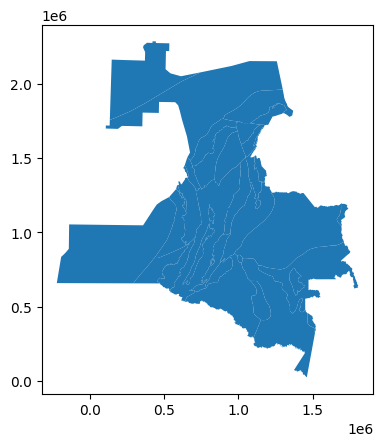

In [ ]:
Cuencas.plot();

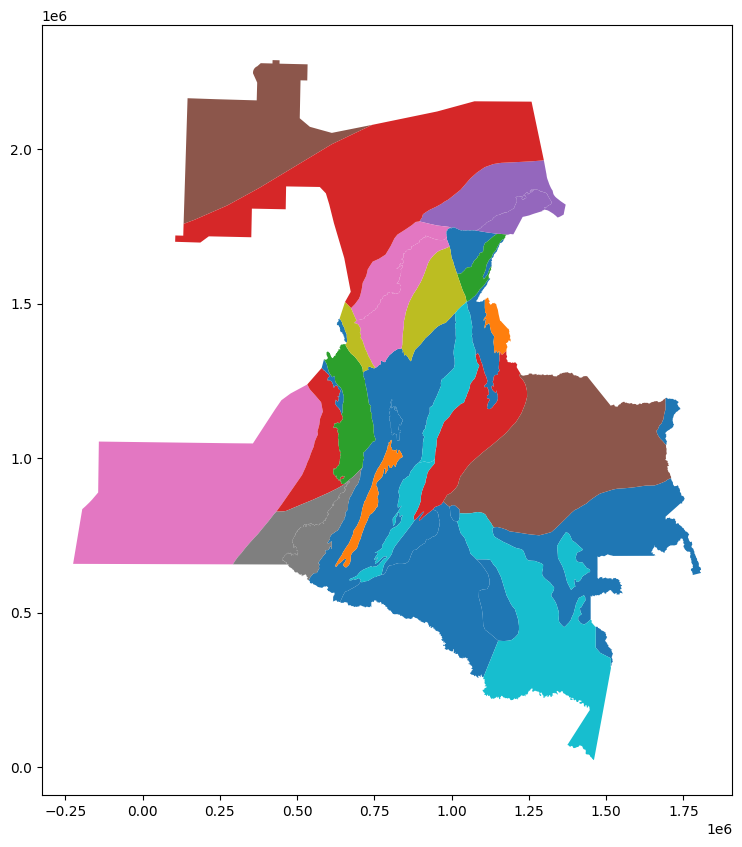

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
Cuencas.plot(column='NOMBRE', ax=ax);

# **3.Emisiones por ciudad**

In [38]:
import pandas as pd

In [39]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
Ciudades = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Emisiones_ciudad/MGN_MPIO_POLITICO.shp")

In [41]:
Ciudades.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DPTO_CCDGO  126 non-null    object  
 1   MPIO_CCDGO  125 non-null    object  
 2   MPIO_CNMBR  125 non-null    object  
 3   MPIO_CRSLC  125 non-null    object  
 4   MPIO_NAREA  125 non-null    float64 
 5   MPIO_CCNCT  125 non-null    object  
 6   MPIO_NANO   125 non-null    float64 
 7   DPTO_CNMBR  128 non-null    object  
 8   SHAPE_AREA  125 non-null    float64 
 9   SHAPE_LEN   125 non-null    float64 
 10  COD         125 non-null    float64 
 11  Emisiones   128 non-null    float64 
 12  Emisiones2  128 non-null    float64 
 13  geometry    128 non-null    geometry
dtypes: float64(7), geometry(1), object(6)
memory usage: 14.1+ KB


In [42]:
Ciudades.head(125)

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CCNCT,MPIO_NANO,DPTO_CNMBR,SHAPE_AREA,SHAPE_LEN,COD,Emisiones,Emisiones2,geometry
0,13,549,PINILLOS,1900,775.568725,13549,2020.0,BOLÍVAR,0.063749,2.158863,13549.0,76.6253,55.9008,"POLYGON ((-74.47832 9.06473, -74.47810 9.06365..."
1,13,580,REGIDOR,Ordenanza 40 de diciembre 1 de 1995,183.452689,13580,2020.0,BOLÍVAR,0.015073,0.898605,13580.0,76.6253,55.9008,"POLYGON ((-73.82012 8.83544, -73.81835 8.83520..."
2,13,600,RÍO VIEJO,Ordenanza 10 de Noviembre 26 de 1982,845.236493,13600,2020.0,BOLÍVAR,0.069408,3.030580,13600.0,37.2955,27.2083,"POLYGON ((-73.99498 8.67376, -73.99475 8.67371..."
3,13,620,SAN CRISTÓBAL,ORD 36 DE FEBRERO DE 1996,42.268805,13620,2020.0,BOLÍVAR,0.003488,0.301725,13620.0,21.0211,15.3356,"POLYGON ((-75.07595 10.41002, -75.07591 10.410..."
4,13,647,SAN ESTANISLAO,1936,211.639257,13647,2020.0,BOLÍVAR,0.017465,0.715870,13647.0,21.0211,15.3356,"POLYGON ((-75.16751 10.45039, -75.16740 10.450..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,70,823,SAN JOSÉ DE TOLUVIEJO,1899,285.015891,70823,2020.0,SUCRE,0.023455,1.209799,70823.0,198.0640,167.8170,"POLYGON ((-75.42058 9.63726, -75.42047 9.63686..."
121,70,473,MORROA,1855,170.014897,70473,2020.0,SUCRE,0.013988,0.676134,70473.0,26.2276,22.2223,"POLYGON ((-75.30950 9.47527, -75.30911 9.47520..."
122,13,300,HATILLO DE LOBA,Ordenanza 30 de diciembre 13 de 1994,194.331015,13300,2020.0,BOLÍVAR,0.015978,1.179350,13300.0,29.8364,21.7667,"MULTIPOLYGON (((-74.03085 9.02909, -74.02946 9..."
123,13,650,SAN FERNANDO,1832,317.324988,13650,2020.0,BOLÍVAR,0.026098,1.116865,13650.0,76.6253,55.9008,"POLYGON ((-74.33597 9.22481, -74.33582 9.22460..."


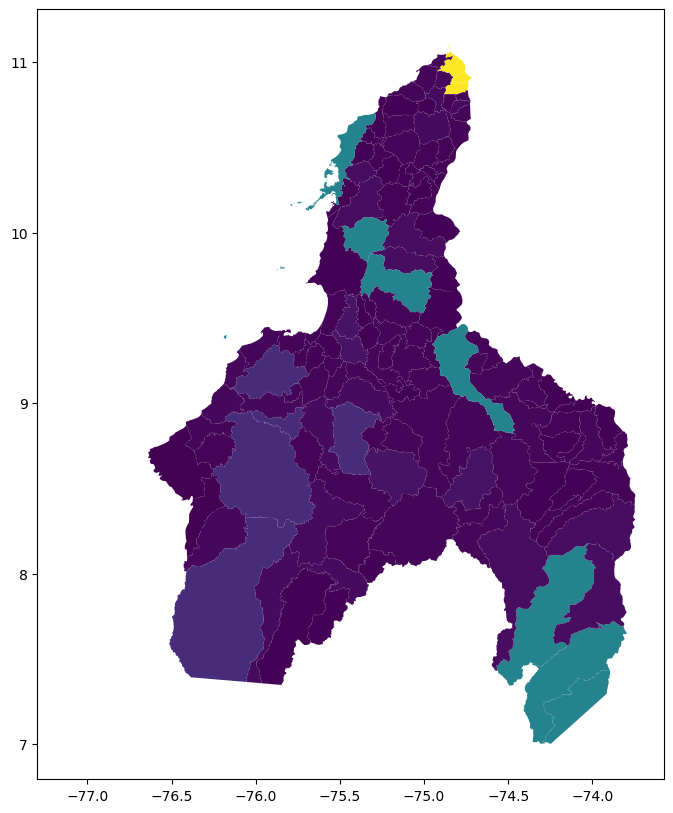

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
Ciudades.plot(column='Emisiones', ax=ax);

# **4.BANCO DE INFORMACIÓN DE LA ANH**

In [37]:
import pandas as pd

In [44]:
Pozos = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Banco_de_Informaci_C3_B3n_Petrolera_3A_Pozos/Banco_de_Informaci%C3%B3n_Petrolera%3A_Pozos.shp")

In [48]:
Sismica = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Banco_de_Informaci_C3_B3n_Petrolera_3A_S_C3_ADsmica_2D/Banco_de_Informaci%C3%B3n_Petrolera%3A_S%C3%ADsmica_2D.shp")

In [49]:
Cubosismico = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Banco_de_Informaci_C3_B3n_Petrolera_3A_S_C3_ADsmica_3D/Banco_de_Información_Petrolera_Sísmica_3D.shp")